In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sys
import os
import glob
import numpy as np
import pandas as pd
import dask.dataframe as dd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import minor locator ticker
import matplotlib.colors as mcolors
from re import split

import calendar

# from dask_jobqueue import SLURMCluster
from matplotlib.colors import LinearSegmentedColormap
# from dask.distributed import Client, progress
from IPython.display import Image
from dask.distributed import Client
import folium

import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
# import hvplot.xarray

import Functions as Func

In [40]:
pluvio = pd.read_csv(r'E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\Pluviometricas_cercanas\Filtradas\Pluviometrica_230.csv', index_col=0, parse_dates=True)
# ds_filtered = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Rain_drop_Size_Data\Siata\Solicitud_Disdros\Thies_Zarr\77_filtrado.zarr")
ds_JPC = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\231_filtrado.zarr")

Pluvio = 230
Disdro = 231
Dis_name = 'La Estrella'

In [32]:
# display(ds_filtered)
display(ds_JPC)
display(pluvio)

<xarray.Dataset> Size: 29GB
Dimensions:       (time: 3911878, diameter: 22, velocity: 20)
Coordinates:
  * diameter      (diameter) float64 176B 0.125 0.25 0.375 0.5 ... 7.0 7.5 8.0
  * time          (time) datetime64[ns] 31MB 2015-10-09T08:55:00 ... 2025-04-...
  * velocity      (velocity) float64 160B 0.1 0.2 0.4 0.6 ... 7.4 8.2 9.0 10.0
Data variables: (12/19)
    Client        (time) <U1 16MB dask.array<chunksize=(10000,), meta=np.ndarray>
    MOR           (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    Synop_Code    (time) <U1 16MB dask.array<chunksize=(10000,), meta=np.ndarray>
    d_m_filt      (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    lwc_filt      (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    n_t           (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    ...            ...
    raw_filtrada  (time, diameter, velocity) float64 14GB dask.array<chunksize=(10000, 22, 20), meta=np.ndarray>
    ref           (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    ref_filt      (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    rl_int        (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    rs_int        (time) float64 31MB dask.array<chunksize=(10000,), meta=np.ndarray>
    vd            (diameter) float64 176B dask.array<chunksize=(22,), meta=np.ndarray>
Attributes:
    institution:  SIATA / Universidad del Quindío
    references:   {'[1]': 'https://doi.org/10.1175/JTECH-D-13-00174.1', '[2]'...
    title:        Thies Disdrometer Precipitation Dataset

,codigo,p1,p2,calidad
fecha_hora,,,,
2015-10-16 00:00:05,160,0.000,0.0,1
2015-10-16 00:01:05,160,0.000,0.0,1
2015-10-16 00:02:05,160,0.254,0.0,1
2015-10-16 00:03:05,160,0.000,0.0,1
2015-10-16 00:04:05,160,0.000,0.0,1
...,...,...,...,...
2025-02-28 23:55:00,160,0.000,0.0,1
2025-02-28 23:56:00,160,0.000,0.0,1
2025-02-28 23:57:00,160,0.000,0.0,1


In [41]:
monthly_r_g, mean_monthly_r_g = Func.Annual_Precipitation_rain_gauge(pluvio['p1'])
# monthly_r_int_2023, mean_monthly_r_int_2023 = Func.Annual_Precipitation_Cycle(ds_filtered['r_int_filt'], 60)
monthly_r_int_2025, mean_monthly_r_int_2025 = Func.Annual_Precipitation_Cycle(ds_JPC['r_int_filt'], 60)
R, R_mean = Func.Annual_Precipitation_Cycle(ds_JPC['r_int'], 60)
x, months = Func.months_indices()

In [34]:
Salada_La = (111.2,	112.6,	183.1,	269.4,	316.6,	221.3,	175.8,	189.1,	262.7,	313.5,	244.2,	155.5)
Alejandria = (178.6,	193.0,	302.1,	439.6,	505.6,	433.3,	400.4,	447.7,	568.9,	545.6,	348.6,	216.0)
Samana = (579.5,	489.1,	589.6,	653.0,	628.9,	332.5,	263.1,	310.0,	530.2,	794.7,	836.4,	810.3)
Chuscal_El = (139.2,	143.9,	231.3,	325.7,	365.0,	247.8,	197.0,	238.9,	314.8,	370.6,	303.4,	177.2)
Trique_El = (93.1,	122.7,	201.7,	283.5,	294.2,	171.5,	163.3,	188.0,	250.5,	323.5,	228.1,	124.8)
Olaya_Herrera = (63.2,	81.4,	129.1,	170.7,	213.5,	149.4,	133.1,	139.7,	181.8,	226.7,	158.9,	104.8)

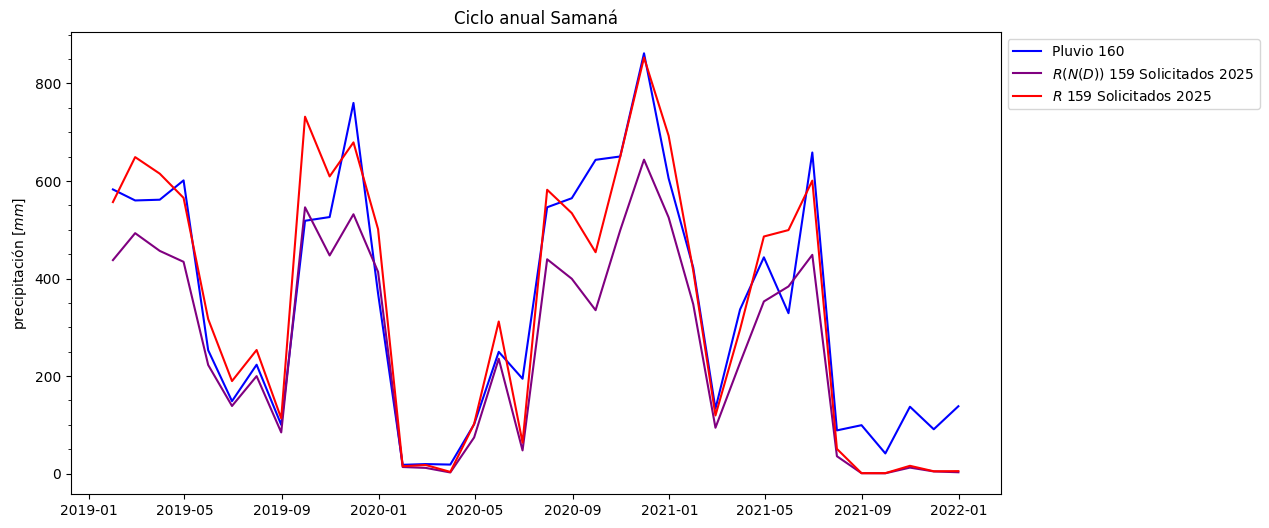

In [36]:
plt.figure(figsize=(12, 6))
plt.title(f'Ciclo anual {Dis_name}')
plt.plot(monthly_r_g.loc[slice('2019','2021')], label=f'Pluvio {Pluvio}', color='blue')
# plt.plot(monthly_r_int_2023.loc[slice('2019','2021')], label=f'$R(N(D))$ {Disdro} Solicitados 2023', color='green')
plt.plot(monthly_r_int_2025.loc[slice('2019','2021')], label=f'$R(N(D))$ {Disdro} Solicitados 2025', color='purple')
plt.plot(R.loc[slice('2019','2021')], label=f'$R$ {Disdro} Solicitados 2025', color='Red')

plt.ylabel('precipitación $[mm]$')

# Configurar minor ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.legend()

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.show()

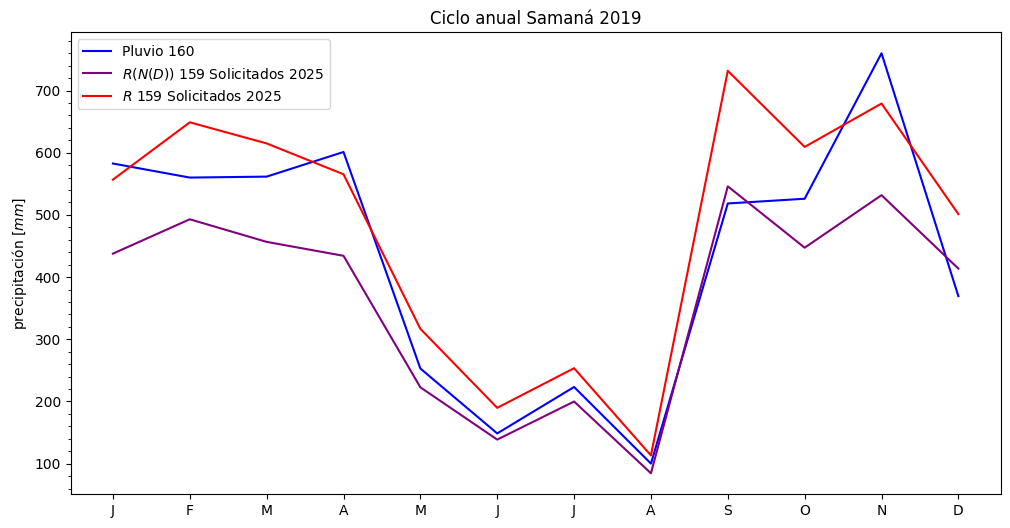

In [37]:
Year = 2019

plt.figure(figsize=(12, 6))
plt.title(f'Ciclo anual {Dis_name} {Year}')

plt.plot(x, monthly_r_g.loc[f'{Year}'], label=f'Pluvio {Pluvio}', color='blue')
# plt.plot(x, monthly_r_int_2023.loc[f'{Year}'], label=f'$R(N(D))$ {Disdro} Solicitados 2023', color='green')
plt.plot(x, monthly_r_int_2025.loc[f'{Year}'], label=f'$R(N(D))$ {Disdro} Solicitados 2025', color='purple')
plt.plot(x, R.loc[f'{Year}'], label=f'$R$ {Disdro} Solicitados 2025', color='Red')


plt.ylabel('precipitación $[mm]$')

# Configurar los ejes
plt.xticks(x, months)

# Configurar minor ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.legend()

plt.show()

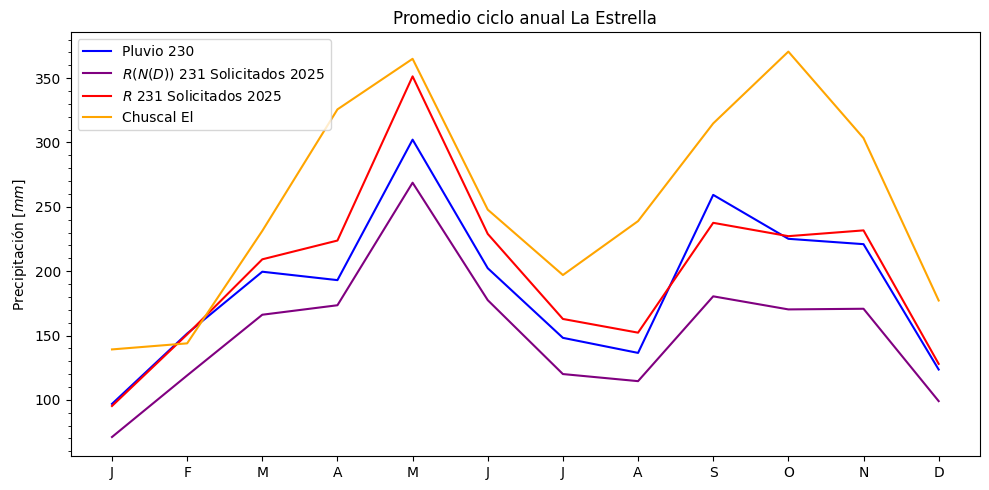

In [42]:
plt.figure(figsize=(10, 5))

plt.plot(x, mean_monthly_r_g.values, label=f'Pluvio {Pluvio}', color='blue')
# plt.plot(x, mean_monthly_r_int_2023, label=f'$R(N(D))$ {Disdro} Solicitados 2023', color='green')
plt.plot(x, mean_monthly_r_int_2025, label=f'$R(N(D))$ {Disdro} Solicitados 2025', color='purple')
plt.plot(x, R_mean, label=f'$R$ {Disdro} Solicitados 2025', color='Red')
plt.plot(x, Chuscal_El, label='Chuscal El', color='orange')

plt.title(f'Promedio ciclo anual {Dis_name}')
# plt.xlabel('Mes')
plt.ylabel('Precipitación $[mm]$')
# plt.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()

# Configurar los ejes
plt.xticks(x, months)

# Configurar minor ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.legend()

plt.show()

In [3]:
suma = np.nansum(ds_JPC['lwc_filt'].values)
print(f"Suma total: {suma}")

cantidad = np.count_nonzero(~np.isnan(ds_JPC['lwc_filt'].values))
print(f"Cantidad de valores: {cantidad}")

Suma total: 99721.44091935344
Cantidad de valores: 4133890


In [ ]:
# Condición combinada: menor que 0.1 o mayor que 12
# condicion_invalida = (ds_filtered['lwc_filt'] < 0.1) | (ds_filtered['lwc_filt'] > 12)
condicion_invalida_2 = (ds_JPC['lwc_filt'] < 0.05) | (ds_JPC['lwc_filt'] > 13)
ds_JPC
# Aplicar la máscara
ds_JPC['lwc_filt'] = ds_JPC['lwc_filt'].where(~condicion_invalida_2, np.nan)
# ds_JPC['r_int_filt'] = ds_JPC['r_int_filt'].where(ds_JPC['r_int_filt'] <= 600, np.nan)

In [5]:
suma_2 = np.nansum(ds_JPC['lwc_filt'].values)
print(f"Suma total: {suma_2}")

cantidad_2 = np.count_nonzero(~np.isnan(ds_JPC['lwc_filt'].values))
print(f"Cantidad de valores: {cantidad_2}")

print('Porcentaje [%] de datos eliminados:', (1 - (cantidad_2 / cantidad)) * 100)
print('Porcentaje [%] de LWC eliminado:', (1 - (suma_2 / suma)) * 100)

Suma total: 94456.07663169915
Cantidad de valores: 253798
Porcentaje [%] de datos eliminados: 93.86055265137679
Porcentaje [%] de LWC eliminado: 5.280072408813751


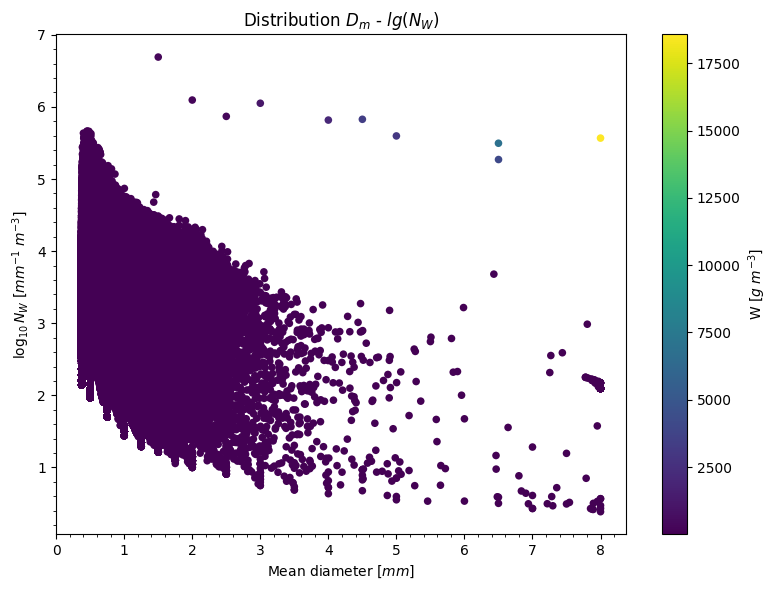

In [12]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el scatter como mapa de calor
sc = ax.scatter(
    ds_JPC.d_m_filt,
    np.log10(ds_JPC.n_w_filt),
    c=ds_JPC.lwc_filt,
    cmap='viridis', 
    norm=mcolors.Normalize(),  # o usa LogNorm() si W_filt varía logarítmicamente
    s=30,  # tamaño de los puntos
    edgecolors='none'
)

# Etiquetas
ax.set_xlabel('Mean diameter $[mm]$')
ax.set_ylabel('$\log_{10}N_W\ [mm^{-1}\ m^{-3}]$')
ax.set_title('Distribution $D_m$ - $lg(N_W)$')

# Barra de color
cbar = plt.colorbar(sc, ax=ax, label='W $[g\ m^{-3}]$')  # Ajusta unidad si es otra

# Ajustes de diseño
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tight_layout()
plt.show()

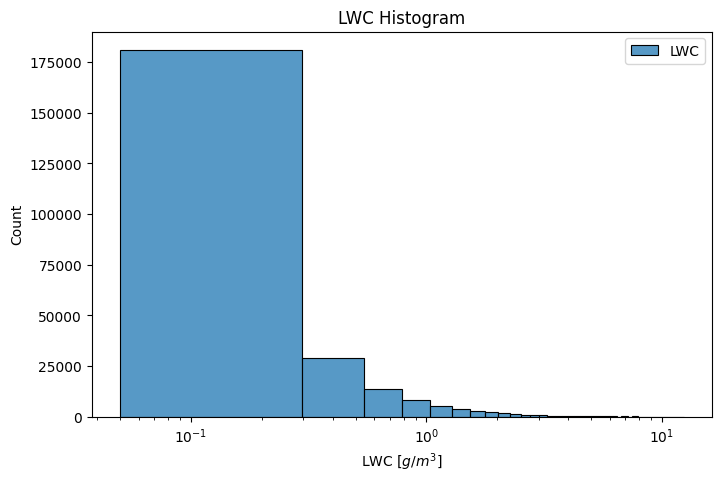

In [10]:
plt.figure(figsize=(8, 5))
#Reflectivity_pd[0].hist(bins=70)
sns.histplot(ds_JPC.lwc_filt, label='LWC', bins=50)
plt.title('LWC Histogram')
plt.xlabel('LWC $[g/m^3]$')
# plt.yscale('log')
# plt.ylabel('Frequency')
# plt.xlim(0, 2)
plt.xscale('log')
plt.legend()

plt.show()

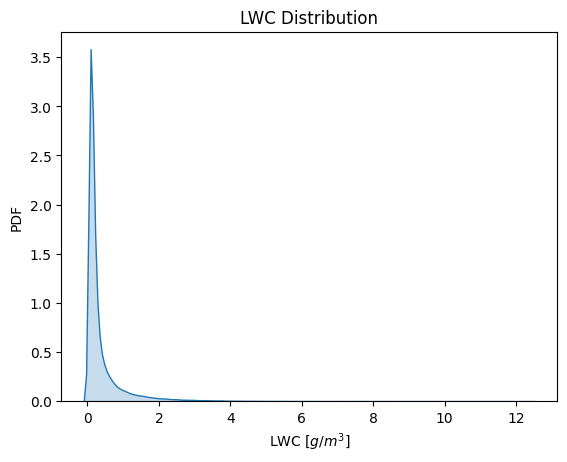

In [7]:
W = ds_JPC.lwc_filt.values.flatten()
W = W[~np.isnan(W)]  # Eliminar NaN

sns.kdeplot(W, fill=True)
plt.xlabel('LWC $[g/m^3]$')
plt.ylabel('PDF')
plt.title('LWC Distribution')
# plt.xlim(0, 2)
# plt.xscale('log')

plt.show()

In [ ]:
# bins = np.histogram_bin_edges(W, bins=50)
# counts, edges = np.histogram(W, bins=bins)

# probabilities = counts / counts.sum()
# bin_centers = 0.5 * (edges[:-1] + edges[1:])

# plt.bar(bin_centers, probabilities, width=np.diff(edges),
#         edgecolor='black', alpha=0.7)
# plt.xlabel('LWC $[g/m^3]$')
# plt.ylabel('PDF')
# # plt.yscale('log')
# # plt.xscale('log')
# plt.title('LWC PDF')
# # plt.xlim(0, 3.5)
# plt.show()

In [ ]:
# ds_1 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\77_filtrado.zarr")
# ds_2 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\78_filtrado.zarr")
# ds_3 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\79_filtrado.zarr")
ds_4 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\80_filtrado.zarr")
# ds_5 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\139_filtrado.zarr")
# ds_6 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\159_filtrado.zarr")
# ds_7 = xr.open_zarr(r"E:\Universidad\Trabajo_de_Grado_Isabel\Datos_Solicitados_SIATA_JPC\resultados\Zarr\231_filtrado.zarr")

In [ ]:
añ = 2020

plt.figure(figsize=(8, 5))

# plt.plot(ds_1.diameter.values, np.log10(ds_1.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='Torre SIATA'.format(Dis_name), color='blue')
# plt.plot(ds_2.diameter.values, np.log10(ds_2.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='Parque 3 Aguas'.format(Dis_name), color='orange')
# plt.plot(ds_3.diameter.values, np.log10(ds_3.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='Santa Rosa de Osos'.format(Dis_name), color='green')
# plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2016', color='red')
# plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2017}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2017', color='green')
# plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2018}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2018', color='blue')
# plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2019}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2019', color='orange')
plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2020}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2020', color='purple')
plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2021}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2021', color='gray')
plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2022}')).nd_filt.sum(dim='time')), label=f'{Dis_name} 2022', color='pink')
plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2023}')).nd_filt.sum(dim='time')), '^', label=f'{Dis_name} 2023', color='black')
plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{2024}')).nd_filt.sum(dim='time')), '--', label=f'{Dis_name} 2024', color='cyan')
# plt.plot(ds_5.diameter.values, np.log10(ds_5.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='Santa Rita Guatape'.format(Dis_name), color='purple')
# plt.plot(ds_6.diameter.values, np.log10(ds_6.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='Samaná'.format(Dis_name), color='pink')
# plt.plot(ds_7.diameter.values, np.log10(ds_7.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='La Estrella'.format(Dis_name), color='brown')
# plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.sel(time=(f'{añ}')).nd_filt.sum(dim='time')), label='El santuario'.format(Dis_name), color='darkgray')

# plt.title(f'{añ}')
plt.ylabel('$log_{10}(N(D))\ [m^{-3}mm^{-1}]$')
plt.xlabel('Diámetro $[mm]$')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(ds_1.diameter.values, np.log10(ds_1.nd_filt.sum(dim='time')), label='Torre SIATA 2025', color='blue')
plt.plot(ds_2.diameter.values, np.log10(ds_2.nd_filt.sum(dim='time')), label='Parque 3 Aguas', color='orange')
plt.plot(ds_3.diameter.values, np.log10(ds_3.nd_filt.sum(dim='time')), label='Santa Rosa de Osos', color='green')
plt.plot(ds_4.diameter.values, np.log10(ds_4.nd_filt.sum(dim='time')), label='EPM Piedras Blancas', color='red')
plt.plot(ds_5.diameter.values, np.log10(ds_5.nd_filt.sum(dim='time')), label='Santa Rita Guatape', color='purple')
plt.plot(ds_6.diameter.values, np.log10(ds_6.nd_filt.sum(dim='time')), label='Samaná', color='pink')
plt.plot(ds_7.diameter.values, np.log10(ds_7.nd_filt.sum(dim='time')), label='La Estrella', color='brown')
plt.plot(ds_JPC.diameter.values, np.log10(ds_JPC.nd_filt.sum(dim='time')), label='El santuario', color='darkgray')

plt.title('2020')
plt.ylabel('$log_{10}(N(D))\ [m^{-3}mm^{-1}]$')
plt.xlabel('Diámetro $[mm]$')
plt.legend()


plt.show()

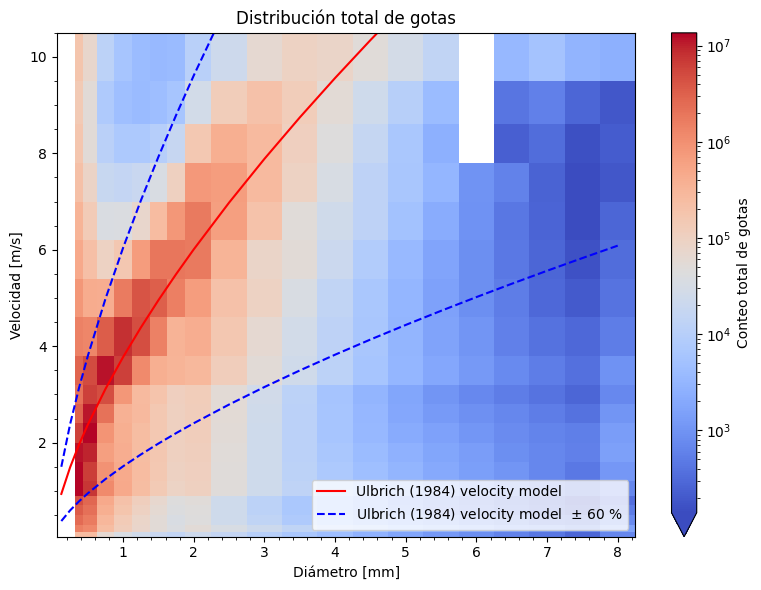

In [5]:
# Crear la figura y eje manualmente
fig, ax = plt.subplots(figsize=(8, 6))

# Sumar en el tiempo y transponer
d_v = ds_JPC.raw.sum(dim='time').T

# Crear la imagen con escala logarítmica
mesh = d_v.plot(
    ax=ax,
    norm=mcolors.LogNorm(
        vmin=d_v.where(d_v > 0).min().compute().item(), 
        vmax=d_v.max().compute().item()
        ),
    cmap='coolwarm',
    cbar_kwargs={'label': 'Conteo total de gotas'},  # título del colorbar
)

plt.plot(ds_JPC.diameter.values, ds_JPC.vd.values, color='red', label='Ulbrich (1984) velocity model')

plt.plot((ds_JPC.diameter).values, (ds_JPC.vd + ds_JPC.vd * 0.6).values, '--', color='blue', label='Ulbrich (1984) velocity model  $\pm$ 60 %')

plt.plot((ds_JPC.diameter).values, (ds_JPC.vd - ds_JPC.vd * 0.6).values, '--', color='blue')

# Modificar los labels de los ejes
ax.set_xlabel('Diámetro [mm]')
ax.set_ylabel('Velocidad [m/s]')
ax.set_title('Distribución total de gotas')

plt.legend()

plt.tight_layout()
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())

plt.show()

# # Crear la figura y eje manualmente
# fig, ax = plt.subplots(figsize=(8, 6))

# # Crear la imagen con escala logarítmica
# d_v.plot()

# plt.plot(ds_JPC.diameter.values, ds_JPC.vd.values, color='red', label='Ulbrich (1984) velocity model')

# plt.plot((ds_JPC.diameter).values, (ds_JPC.vd + ds_JPC.vd * 0.6).values, '--', color='blue', label='Ulbrich (1984) velocity model  $\pm$ 60 %')

# plt.plot((ds_JPC.diameter).values, (ds_JPC.vd - ds_JPC.vd * 0.6).values, '--', color='blue')

# # Modificar los labels de los ejes
# ax.set_xlabel('Diámetro [mm]')
# ax.set_ylabel('Velocidad [m/s]')
# ax.set_title('Distribución total de gotas')

# plt.legend()

# plt.tight_layout()
# plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
# plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())

# plt.show()